# Regressão Logística I
## Tarefa I

Neste exercício vamos trabalhar com a base "Heart Disease Data Set" disponível no site do [UCI](https://archive.ics.uci.edu/ml/datasets/heart+disease).

Temos 303 indivíduos e vamos utilizar 13 variáveis disponíveis para prever a presença de doença cardíaca na variável ```num```(a 14$^a$ variável).

A descrição das variáveis está recortada abaixo:
- age: idade do paciente em anos
- sex: sexo (1 = male; 0 = female)  
- cp: tipo de dor no peito
  - 1: angina típica
  - 2: angina atípica
  - 3: dor não-angina
  - 4: assintomático
- trestbps: pressão sanguínea em repouso (em mm Hg na admissão ao hospital
- chol: colesterol sérico em mg/dl
- fbs: (açúcar no sangue em jejum > 120 mg/dl) (1 = True; 0 = False)
- restecg: resultados eletrocardiográficos em repouso
  - 0: normal
  - 1: tendo anormalidade da onda ST-T (Inversões de onda T e / ou ST com elevação ou depressão de > 0.05 mV)
  - 2: mostrando hipertrofia ventricular esquerda provável ou definitiva pelos critérios de Estes
- thalach: frequência cardíaca máxima alcançada
- exang: angina induzida por exercício(1 = sim; 0 = não)
- oldpeak = Depressão de ST induzida por exercício em relação ao repouso
- slope: Depressão de ST induzida por exercício em relação ao repouso
  - 1: inclinação ascendente
  - 2: estável
  - 3: inclinação descendente
- ca: número de vasos principais (0-3) coloridos por fluorosopia
- thal: 3 = normal; 6 = defeito corrigido; 7 = defeito reversível
- num: diagnóstico de doença cardíaga (status de doença angiográfica)

In [143]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

import statsmodels.formula.api as smf

In [151]:
url = 'https://archive.ics.uci.edu/ml/machine-learning-databases/heart-disease/processed.cleveland.data'

df = pd.read_csv(url, 
                 names=['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg',
                        'thalach', 'exang', 'oldpeak', 'slope', 'ca', 'thal', 'num'])
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num
0,63.0,1.0,1.0,145.0,233.0,1.0,2.0,150.0,0.0,2.3,3.0,0.0,6.0,0
1,67.0,1.0,4.0,160.0,286.0,0.0,2.0,108.0,1.0,1.5,2.0,3.0,3.0,2
2,67.0,1.0,4.0,120.0,229.0,0.0,2.0,129.0,1.0,2.6,2.0,2.0,7.0,1
3,37.0,1.0,3.0,130.0,250.0,0.0,0.0,187.0,0.0,3.5,3.0,0.0,3.0,0
4,41.0,0.0,2.0,130.0,204.0,0.0,2.0,172.0,0.0,1.4,1.0,0.0,3.0,0


In [158]:
df['Condição'] = (df['num'] != 0).astype('int64')
df

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num,condição,Condição
0,63.0,1.0,1.0,145.0,233.0,1.0,2.0,150.0,0.0,2.3,3.0,0.0,6.0,0,0,0
1,67.0,1.0,4.0,160.0,286.0,0.0,2.0,108.0,1.0,1.5,2.0,3.0,3.0,2,1,1
2,67.0,1.0,4.0,120.0,229.0,0.0,2.0,129.0,1.0,2.6,2.0,2.0,7.0,1,1,1
3,37.0,1.0,3.0,130.0,250.0,0.0,0.0,187.0,0.0,3.5,3.0,0.0,3.0,0,0,0
4,41.0,0.0,2.0,130.0,204.0,0.0,2.0,172.0,0.0,1.4,1.0,0.0,3.0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,45.0,1.0,1.0,110.0,264.0,0.0,0.0,132.0,0.0,1.2,2.0,0.0,7.0,1,1,1
299,68.0,1.0,4.0,144.0,193.0,1.0,0.0,141.0,0.0,3.4,2.0,2.0,7.0,2,1,1
300,57.0,1.0,4.0,130.0,131.0,0.0,0.0,115.0,1.0,1.2,2.0,1.0,7.0,3,1,1
301,57.0,0.0,2.0,130.0,236.0,0.0,2.0,174.0,0.0,0.0,2.0,1.0,3.0,1,1,1


1. Monte uma bivariada para a variável ```sex``` com as seguintes estatísticas:

- Número de *saudáveis*
- Número de *doentes*
- Total
- Quantidade média de doentes
- *Odds*
- *Odds ratio* (Use o total como referência)
- Logito (LOG(*Odds*))
- O LOG do *Odds ratio* (com o total como referência) é chamado de *Weight of Evidence* (WOE). Calcule-o.

In [159]:
colunas = {'All': 'Total', 0: 'Saudavel', 1: 'Doente'}
indice = {'All': 'Total', 0:'Feminino', 1: 'Masculino'}

tab_1 = (pd.crosstab(df['sex'], df['Condição'], margins= True)
       .assign(Percentual_Doentes = lambda x: x[1]/x['All'])
       .assign(Chance = lambda x: x[1]/x[0])
       .assign(Razão_Chance = lambda x: x['Chance']/x.loc['All','Chance'])
       .assign(Log_Chance = lambda x: np.log(x['Chance']))
       .assign(Log_Razão_Chance = lambda x: np.log(x['Razão_Chance']))
       .rename_axis('sexo')
       .rename (columns = colunas, index=indice)                
      )

tab_1

Condição,Saudavel,Doente,Total,Percentual_Doentes,Chance,Razão_Chance,Log_Chance,Log_Razão_Chance
sexo,,,,,,,,
Feminino,72,25,97,0.257732,0.347222,0.409672,-1.057790,-0.892398
Masculino,92,114,206,0.553398,1.239130,1.461996,0.214410,0.379802
Total,164,139,303,0.458746,0.847561,1.000000,-0.165392,0.000000


2. Monte uma bivariada para a variável ```age``` com as seguintes estatísticas:
- Categorize a variável em 5 grupos
- Calcule as mesmas quantidades calculadas no execício anterior
- Calcule também o valor médio da variável ```age```

In [160]:
#Criando coluna categorizando por 5 faixas de idade
df_class_age = df.assign(Idade =  lambda x : pd.qcut(x.age,q=5,precision = 0))          
df_class_age.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num,condição,Condição,Idade
0,63.0,1.0,1.0,145.0,233.0,1.0,2.0,150.0,0.0,2.3,3.0,0.0,6.0,0,0,0,"(62.0, 77.0]"
1,67.0,1.0,4.0,160.0,286.0,0.0,2.0,108.0,1.0,1.5,2.0,3.0,3.0,2,1,1,"(62.0, 77.0]"
2,67.0,1.0,4.0,120.0,229.0,0.0,2.0,129.0,1.0,2.6,2.0,2.0,7.0,1,1,1,"(62.0, 77.0]"
3,37.0,1.0,3.0,130.0,250.0,0.0,0.0,187.0,0.0,3.5,3.0,0.0,3.0,0,0,0,"(28.0, 45.0]"
4,41.0,0.0,2.0,130.0,204.0,0.0,2.0,172.0,0.0,1.4,1.0,0.0,3.0,0,0,0,"(28.0, 45.0]"


In [162]:
#criando a tabela para as faixas de idade
tab_2 = (pd.crosstab(df_class_age['Idade'], df_class_age['Condição'], margins= True)
       .assign(Percentual_Doentes = lambda x: x[1]/x['All'])
       .assign(Chance = lambda x: x[1]/x[0])
       .assign(Razão_Chance = lambda x: x['Chance']/x.loc['All','Chance'])
       .assign(Log_Chance = lambda x: np.log(x['Chance']))
       .assign(Log_Razão_Chance = lambda x: np.log(x['Razão_Chance']))
       .assign(Idade_Media = lambda x: df_class_age.groupby('Idade').age.mean())
       .rename (columns = colunas, index=indice)                
      )

tab_2.loc['Total','Idade_Media'] = df_class_age.groupby('Idade').age.mean().mean()

tab_2

Condição,Saudavel,Doente,Total,Percentual_Doentes,Chance,Razão_Chance,Log_Chance,Log_Razão_Chance,Idade_Media
Idade,,,,,,,,,
"(28.0, 45.0]",47,16,63,0.253968,0.340426,0.401653,-1.077559,-0.912166,41.222222
"(45.0, 53.0]",42,22,64,0.343750,0.523810,0.618020,-0.646627,-0.481235,50.000000
"(53.0, 58.0]",32,39,71,0.549296,1.218750,1.437950,0.197826,0.363218,56.211268
"(58.0, 62.0]",13,32,45,0.711111,2.461538,2.904261,0.900787,1.066179,60.355556
"(62.0, 77.0]",30,30,60,0.500000,1.000000,1.179856,0.000000,0.165392,66.516667
Total,164,139,303,0.458746,0.847561,1.000000,-0.165392,0.000000,54.861142


3. Visualize a informação da bivariada construída acima através de um gráfico da sua escolha.

Text(0.5, 1.05, 'Quantidade de Pacientes x Condição e Idade')

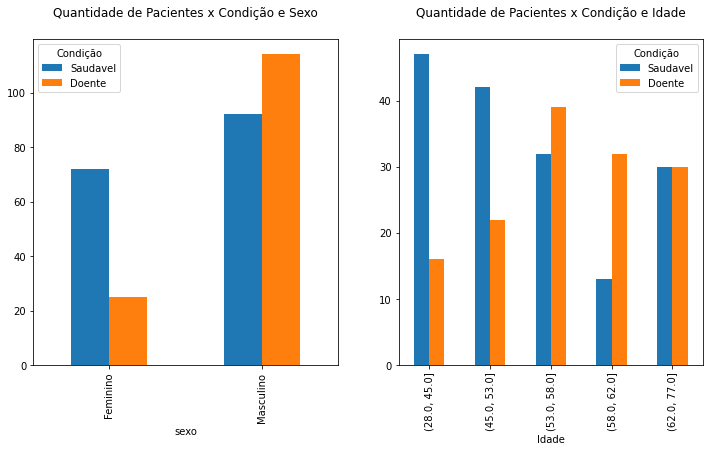

In [163]:
#configurando um sistema de eixos
plt.rc('figure', figsize=(12, 6))
fig, axes = plt.subplots(1, 2)
#gráfico pacientes X condição x sexo
ax1 = axes[0]
tab_1[0:2][['Saudavel','Doente']].plot.bar( ax= ax1)
#gráfico pacientes X condição x faixa de idade
ax2 = axes[1]
tab_2[0:5][['Saudavel','Doente']].plot.bar(ax = ax2)
#Configurando os títulos dos graficos
ax1.set_title ('Quantidade de Pacientes x Condição e Sexo', y= 1.05)
ax2.set_title ('Quantidade de Pacientes x Condição e Idade', y= 1.05)

Da análise do gráficos, observa-se uma indicação que a probabilidade de doença cardiaca é maior para o sexo masculino e para as faixas de idade acima de (45,53]